# Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# EDA

<AxesSubplot:xlabel='Age', ylabel='count'>

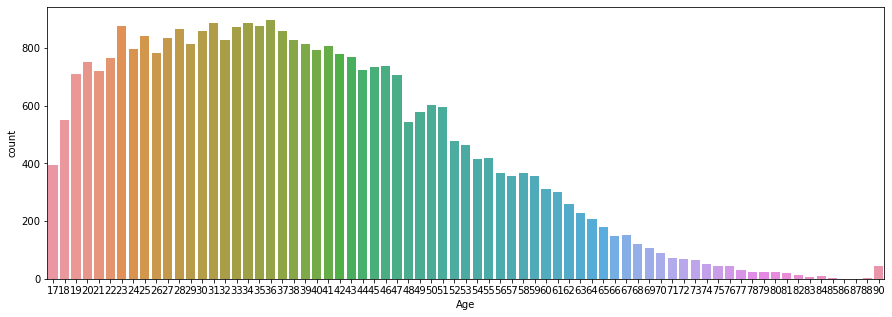

In [7]:
#Plotting the graph of Age
plt.figure(figsize=(15,5))
sns.countplot(df["Age"])

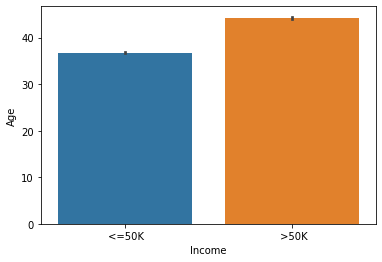

In [8]:
#Finding the relationship of Age & Income
sns.barplot(y="Age", x="Income", data=df)
plt.show()

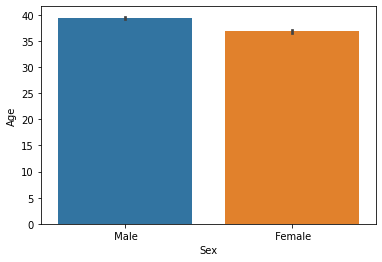

In [9]:
#Finding the relationship of Age & Income
sns.barplot(y="Age", x="Sex", data=df)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

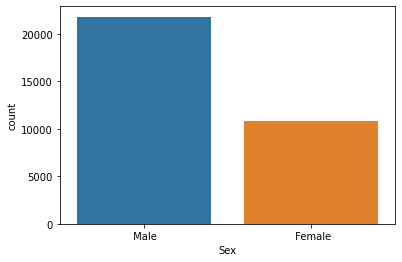

In [10]:
sns.countplot(x="Sex", data=df)

In [11]:
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='Age'>

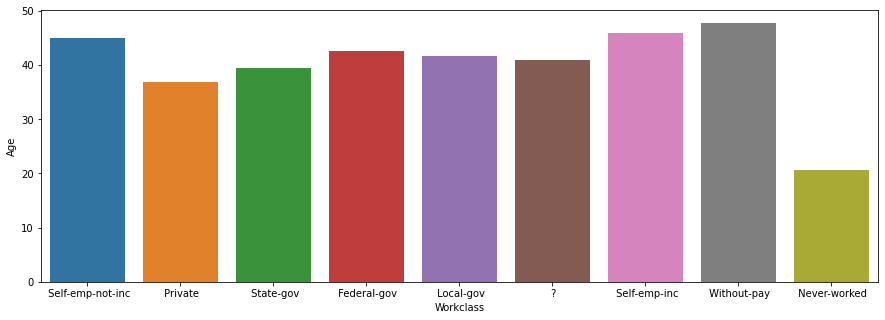

In [12]:
#Plotting the graph of Age Vs Worlclass
plt.figure(figsize=(15,5))
sns.barplot(y="Age",x="Workclass", data=df, ci=None)

In [13]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

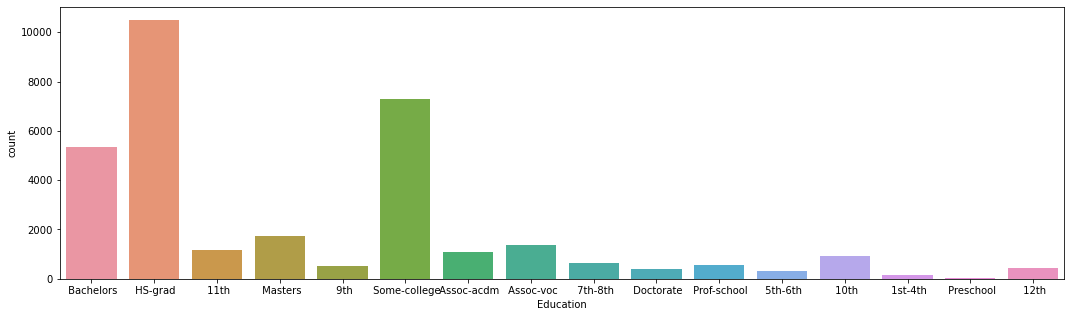

In [14]:
#Education & workclass
plt.figure(figsize=(18,5))
sns.countplot(x=df["Education"])

<AxesSubplot:xlabel='Education', ylabel='count'>

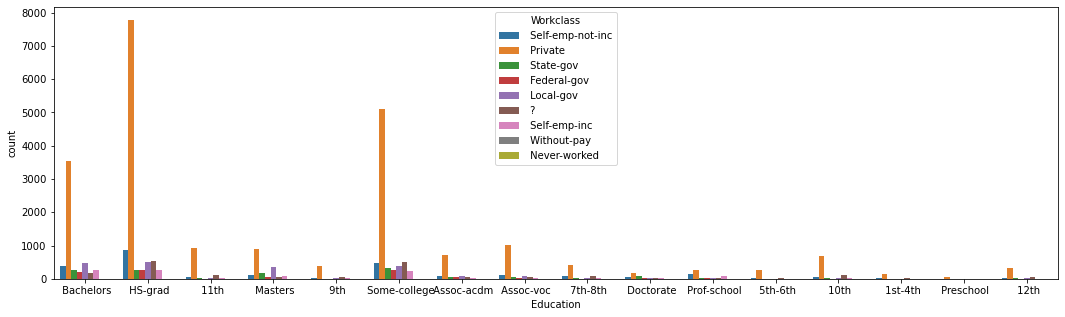

In [15]:
#Education & workclass
plt.figure(figsize=(18,5))
sns.countplot(x=df["Education"], hue=df["Workclass"])

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

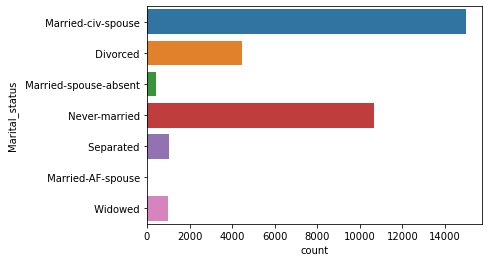

In [16]:
sns.countplot(y=df["Marital_status"])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

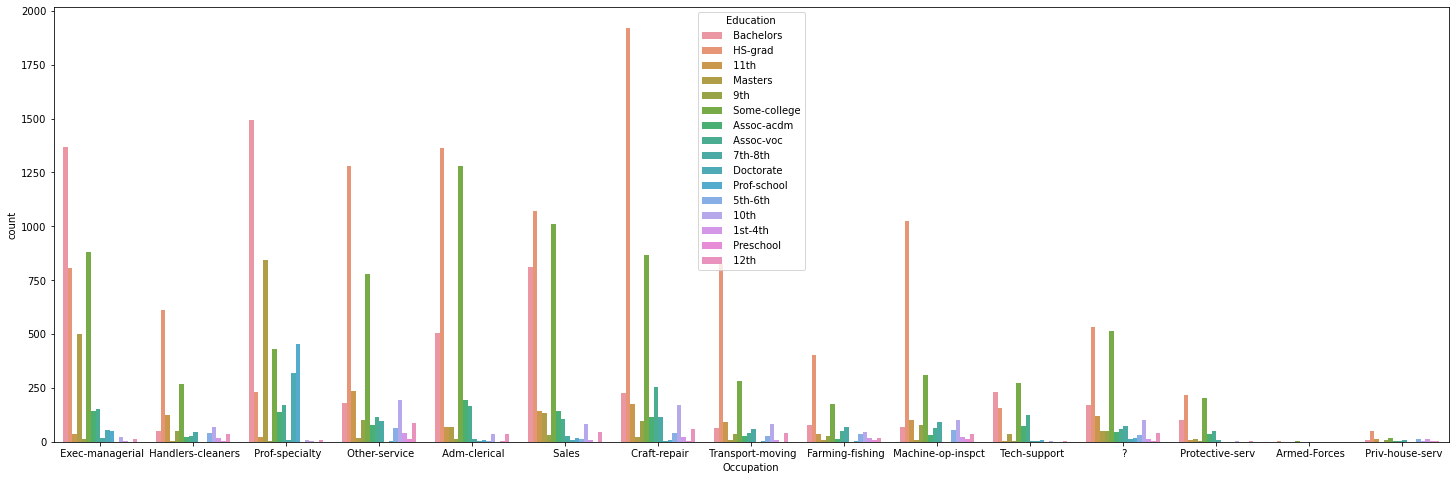

In [17]:
#Education & Occupation
plt.figure(figsize=(25,8))
sns.countplot(x=df["Occupation"], hue=df["Education"])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

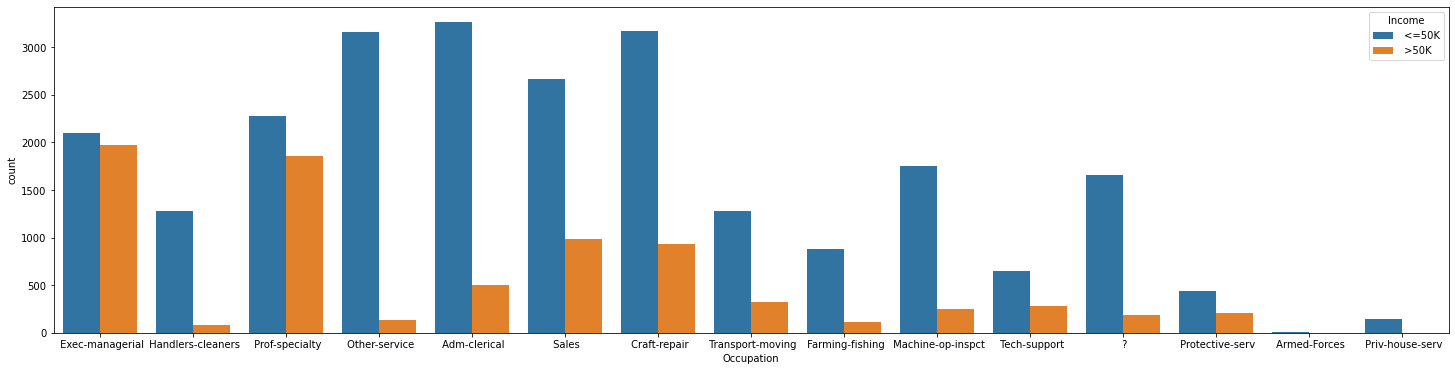

In [18]:
#Finding Occupation mVs Income
plt.figure(figsize=(25,6))
sns.countplot(x=df["Occupation"], hue=df["Income"])


<AxesSubplot:xlabel='Relationship', ylabel='count'>

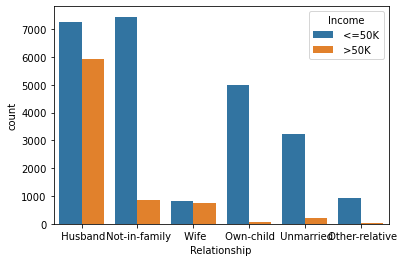

In [19]:
#Plotting the graph of relationship Vs Income
sns.countplot(df["Relationship"], hue=df["Income"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

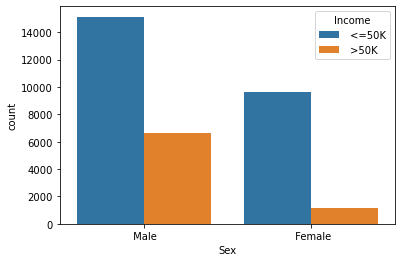

In [20]:
#Plotting the graph of Sex Vs Income
sns.countplot(df["Sex"], hue=df["Income"])

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

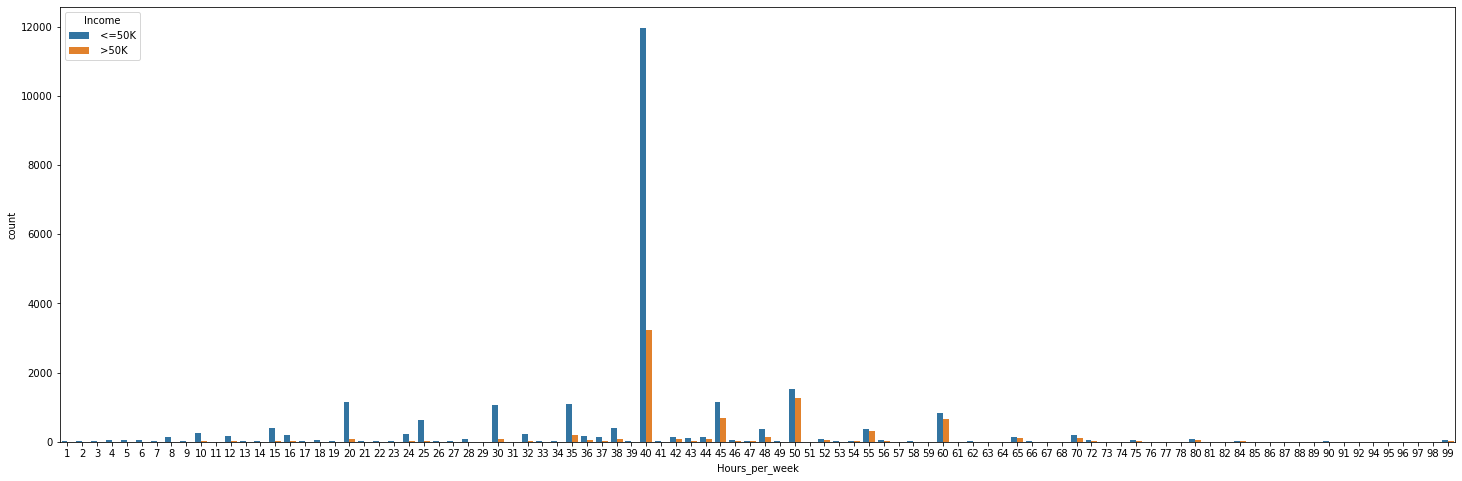

In [21]:
#Plotting the graph of Hours_per_week Vs Income
plt.figure(figsize=(25,8))
sns.countplot(x=df["Hours_per_week"], hue=df["Income"])

<AxesSubplot:xlabel='count', ylabel='Native_country'>

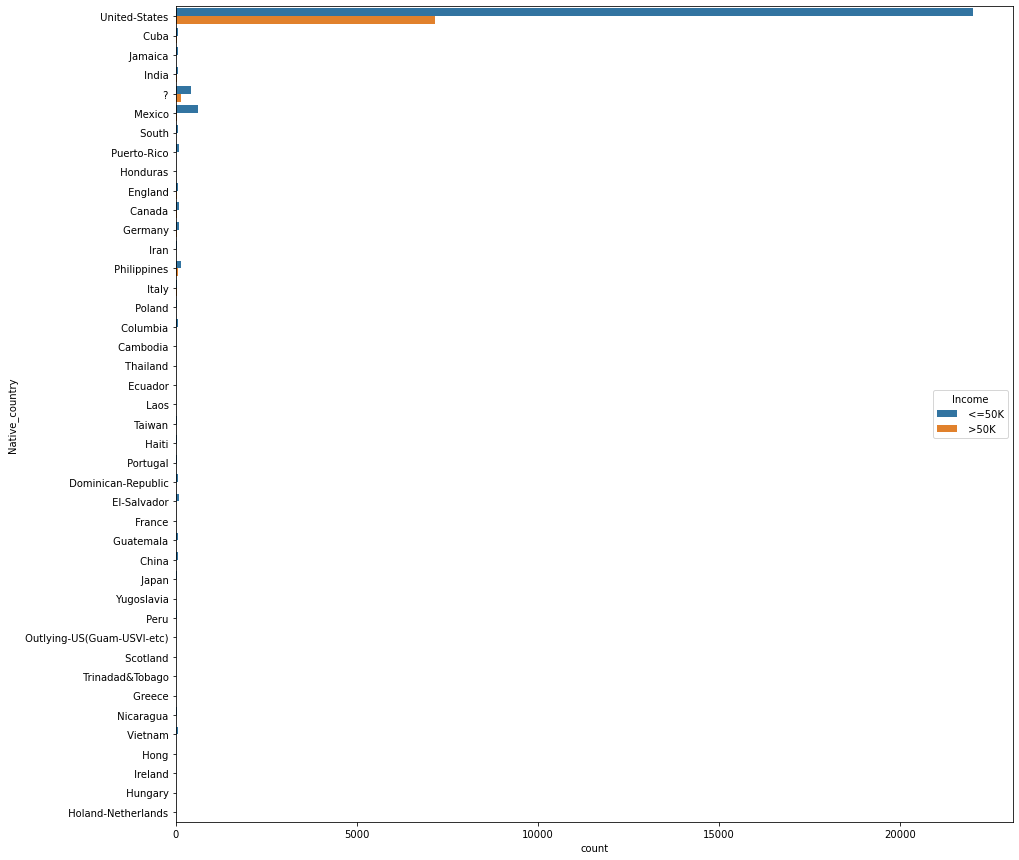

In [23]:
#Finding which countr peoples are getting good income

plt.figure(figsize=(15,15))
sns.countplot(y=df["Native_country"], hue=df["Income"])

In [25]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='Sex', ylabel='count'>

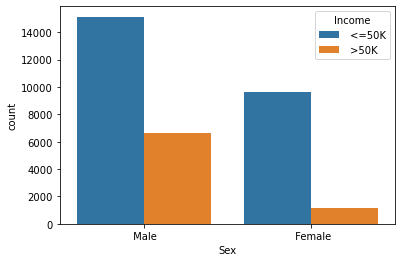

In [26]:
#Sex Vs Income
sns.countplot(x=df["Sex"], hue=df["Income"])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

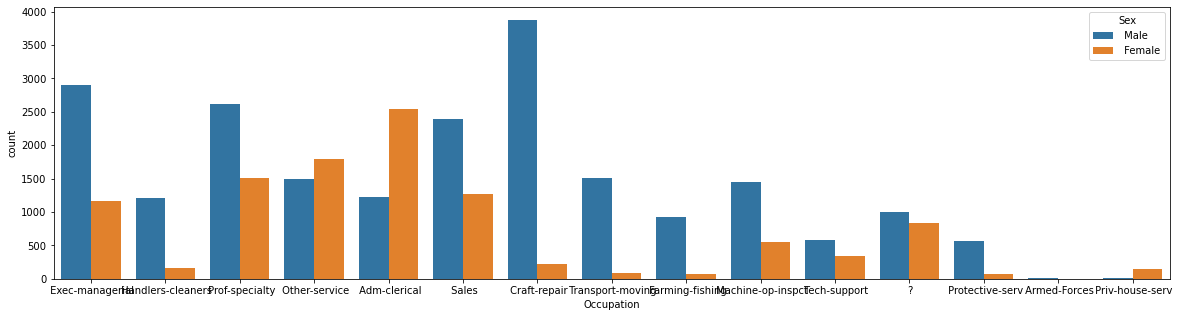

In [27]:
#Finding Occupation Vs Sex
plt.figure(figsize=(20,5))
sns.countplot(x=df["Occupation"], hue=df["Sex"])

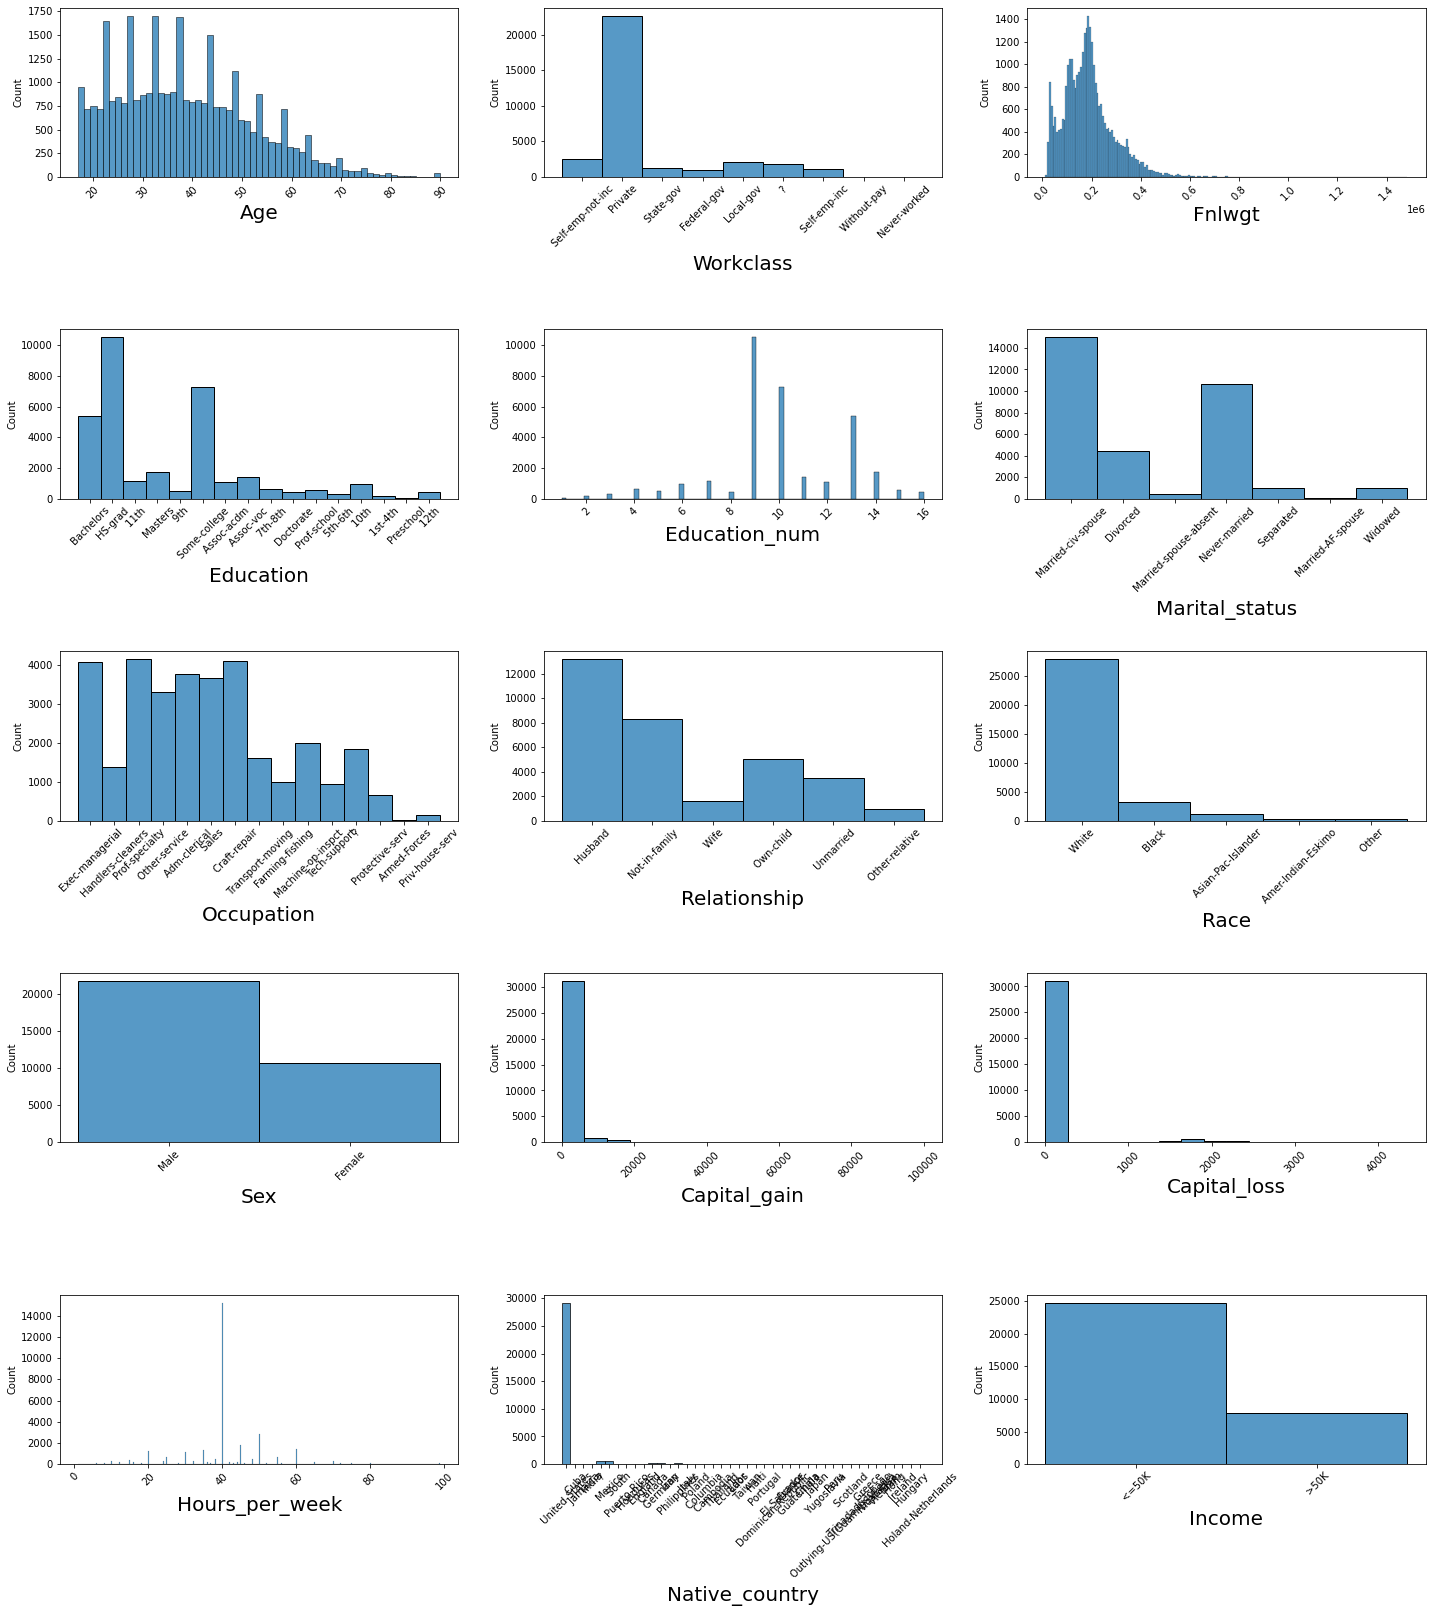

In [28]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=20:
        ax=plt.subplot(6,3, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation = 45)
    plotnumber+=1
    
plt.tight_layout()

In [29]:
#Lets convert Object dataset using encoding

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Encoding the object datatype using label encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [32]:
cols=["Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex","Native_country","Income"]

df[cols]=df[cols].apply(LabelEncoder().fit_transform)

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


# Visualising the outliers using Box Plot

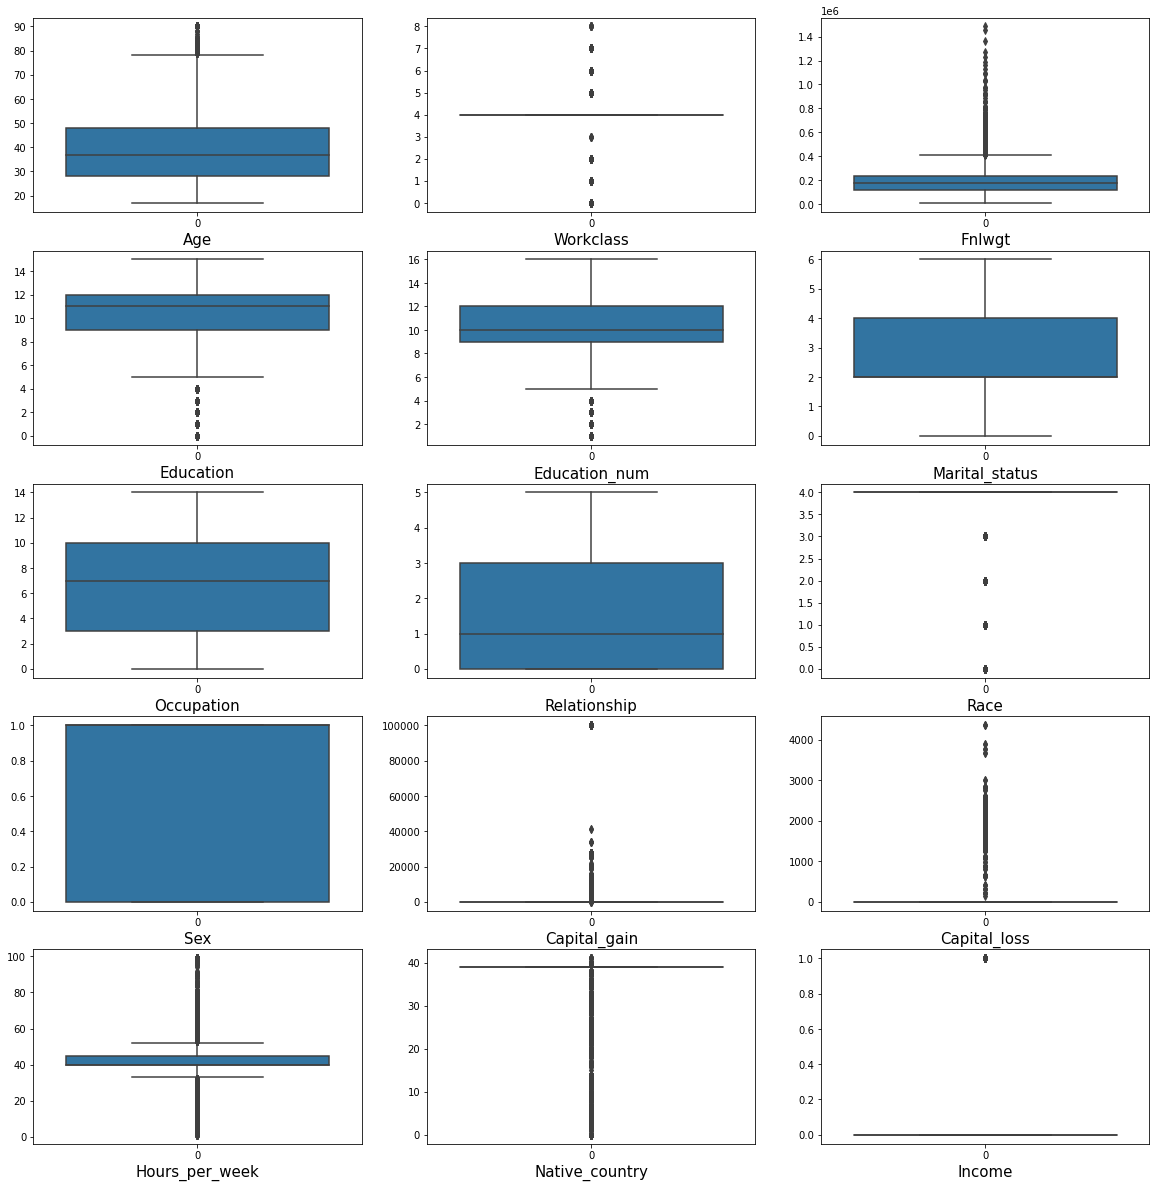

In [33]:
#Visualize the outliers using boxplot

plt.figure(figsize=(20,25))
graph=1

for column in df:
    if graph<=20:
        plt.subplot(6,3, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

In [139]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Finding the correlationship between dataset using Heatmap

<AxesSubplot:>

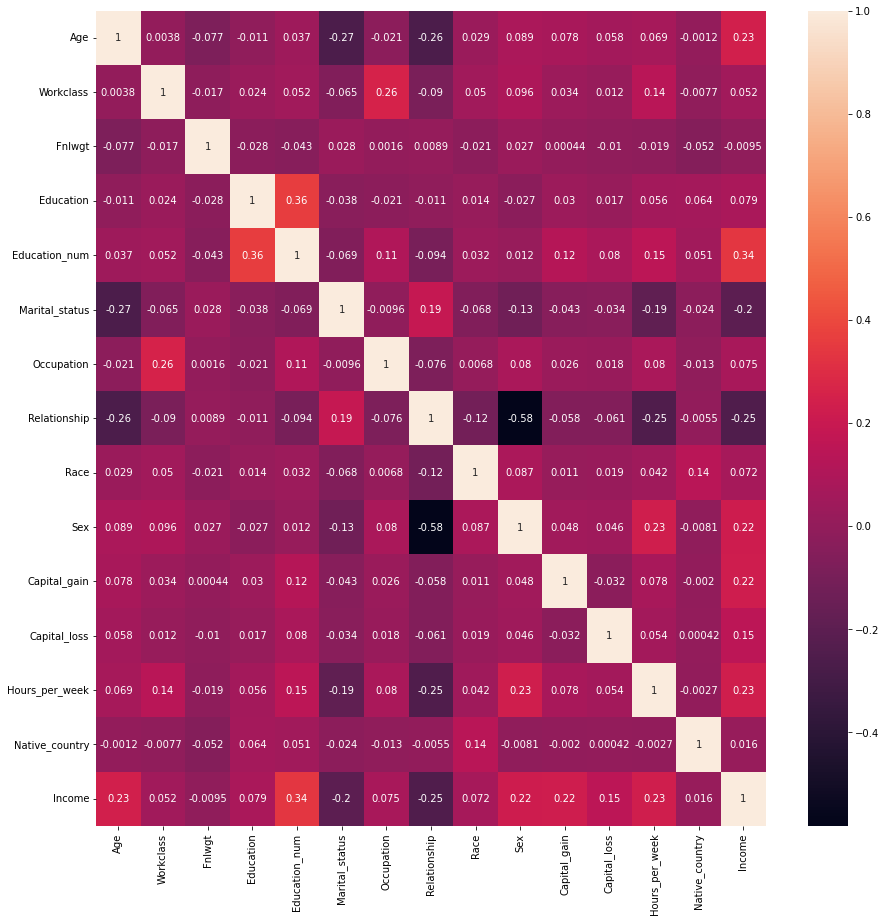

In [36]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), annot=True)

In [140]:
x= df[['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']]
y=df["Income"]


In [141]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [142]:
#Finding Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,1.160402,Age
1,1.093995,Workclass
2,1.012305,Fnlwgt
3,1.159309,Education
4,1.218410,Education_num
5,1.127458,Marital_status
6,1.091861,Occupation
7,1.682665,Relationship
8,1.038275,Race
9,1.559439,Sex


# Train Test Split

In [143]:
x_train,x_test, y_train,y_test= train_test_split(x_scaled, y, test_size=0.25)

In [144]:
#Write the function & call it is as many as times to check the accuracy score of different model
def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("=============Train Result==============")
        
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train== False:
        pred=clf.predict(x_test)
        
        print("=============Test Result==============")
        
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n Test Classification report \n ", classification_report(y_test,pred,digits=2)) #For model accuracy
        
        

# Model Initialisation with Decision Tree Classifier

In [74]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [75]:
#Call the function & check check train & test score

In [76]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:100.00%
=============Test Result==============
Accuracy score:80.58%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.88      0.86      0.87      6149
           1       0.60      0.62      0.61      1991

    accuracy                           0.81      8140
   macro avg       0.74      0.74      0.74      8140
weighted avg       0.81      0.81      0.81      8140



In [51]:
#Training score 100% this is the problem decision tree overfit.Because its ruled based algorithm.It could leads to overfitting.

In [52]:
#Overall precsion score is 80%, recall score:-74%, F1 score:-74%, accuracy:81%

# Parameter Tunning

In [53]:
#We are tunning the parameter , passing different values for oth parameters
param_grid={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [54]:
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid,cv=5,n_jobs=-1)

In [55]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [56]:
#Finding best parameters
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [57]:
#Initiate Decision tree with new parameters & train
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 7, min_samples_leaf= 2, min_samples_split=3)

#Train the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=2,
                       min_samples_split=3)

In [58]:
# Call the function & pass the dataset to check train test score
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:83.99%
=============Test Result==============
Accuracy score:83.94%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.85      0.96      0.90      6189
           1       0.77      0.47      0.58      1951

    accuracy                           0.84      8140
   macro avg       0.81      0.71      0.74      8140
weighted avg       0.83      0.84      0.82      8140



In [59]:
#Lets plot confusion matrix
y_pred=clf.predict(x_test)

In [60]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[5918,  271],
       [1036,  915]], dtype=int64)

In [61]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [62]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.04378736 1.        ]
True Positive Rate [0.         0.46899026 1.        ]
Threshold [2 1 0]


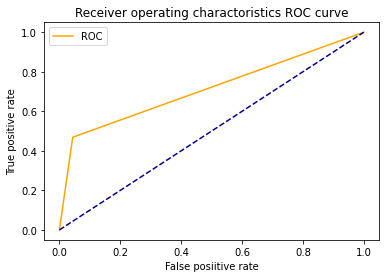

In [63]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [64]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.7126014483625691


# Lets predict the income using classification model

In [86]:
print("Prediction of Income (>50K or <=50K $):  ", clf.predict(scalar.transform([[22,4,201490,11,9,4,1,3,4,1,0,0,20,39]])))
print("Prediction of Income (>50K or <=50K $) :  ", clf.predict(scalar.transform([[52,5,287927,11,9,2,4,5,4,0,15024,0,40,39]])))

Prediction of Income (>50K or <=50K $):   [0]
Prediction of Income (>50K or <=50K $) :   [1]


In [83]:
df.tail(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32559,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [ ]:
-From Clf model we have successfully predicted the Income of peoples.

# Using KNN Classifier

In [87]:
#Initiate Kneighbor classifier
knn=KNeighborsClassifier()

#Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [88]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:88.03%
=============Test Result==============
Accuracy score:82.56%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.87      0.91      0.89      6149
           1       0.67      0.58      0.62      1991

    accuracy                           0.83      8140
   macro avg       0.77      0.74      0.75      8140
weighted avg       0.82      0.83      0.82      8140



In [89]:
#Got training accuracy score: 88%, testing accuracy score: 82%.
#Accuracy score:-82%, Precision: 77%, recall: 74%, f1 score: 75%

In [91]:
#cross validationscore to check if the model is overfitting
from sklearn.model_selection import KFold, cross_val_score

cross_val_score(knn,x_scaled,y, cv=5)


array([0.81956388, 0.82248157, 0.82939189, 0.83753071, 0.82831695])

In [92]:
cross_val_score(KNeighborsClassifier(),x_scaled,y, cv=5).mean()

0.8274570024570025

In [94]:
#Let us use the grid search cv for the best parameter tunning to increase accuracy

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[3,5,6,7,8],
           "n_neighbors": [3,5,7,9,11,13]}

In [97]:
gridsearch=GridSearchCV(estimator=knn, param_grid=param_grid)

In [98]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [99]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [100]:
#We will use best parameters in our knn & check accuracy is increasing
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=3, n_neighbors=13)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [102]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:85.71%
=============Test Result==============
Accuracy score:83.07%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.87      0.92      0.89      6149
           1       0.69      0.56      0.62      1991

    accuracy                           0.83      8140
   macro avg       0.78      0.74      0.75      8140
weighted avg       0.82      0.83      0.82      8140



In [104]:
#Lets plot confusion matrix
y_pred=knn.predict(x_test)


In [105]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[5650,  499],
       [ 879, 1112]], dtype=int64)

In [107]:
print("Prediction of Income (>50K or <=50K $):  ", knn.predict(scalar.transform([[22,4,201490,11,9,4,1,3,4,1,0,0,20,39]])))
print("Prediction of Income (>50K or <=50K $) :  ", knn.predict(scalar.transform([[52,5,287927,11,9,2,4,5,4,0,15024,0,40,39]])))

Prediction of Income (>50K or <=50K $):   [0]
Prediction of Income (>50K or <=50K $) :   [1]


# Random Forest

In [145]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [146]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:99.99%
=============Test Result==============
Accuracy score:85.60%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.89      0.93      0.91      6191
           1       0.74      0.62      0.67      1949

    accuracy                           0.86      8140
   macro avg       0.81      0.78      0.79      8140
weighted avg       0.85      0.86      0.85      8140



# Lets tune parameters using GridSearchCV

In [147]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [148]:
random_clf=RandomForestClassifier(criterion= 'entropy', max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15)


random_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [149]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:88.10%
=============Test Result==============
Accuracy score:86.31%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.88      0.95      0.91      6191
           1       0.78      0.60      0.68      1949

    accuracy                           0.86      8140
   macro avg       0.83      0.77      0.79      8140
weighted avg       0.86      0.86      0.86      8140



In [150]:
#Lets plot confusion matrix
y_pred=random_clf.predict(x_test)

In [151]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[5861,  330],
       [ 784, 1165]], dtype=int64)

In [152]:
# Lets plot ROC, AUC curve to chose best model

In [153]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [154]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.05330318 1.        ]
True Positive Rate [0.         0.59774243 1.        ]
Threshold [2 1 0]


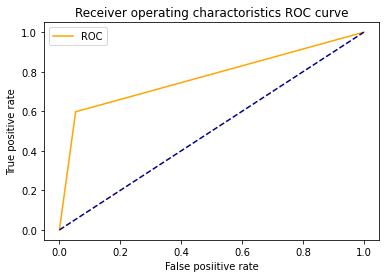

In [155]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [156]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.7722196249889879


In [157]:
print("Prediction of Income (>50K or <=50K $):  ", knn.predict(scalar.transform([[22,4,201490,11,9,4,1,3,4,1,0,0,20,39]])))
print("Prediction of Income (>50K or <=50K $) :  ", knn.predict(scalar.transform([[52,5,287927,11,9,2,4,5,4,0,15024,0,40,39]])))

Prediction of Income (>50K or <=50K $):   [0]
Prediction of Income (>50K or <=50K $) :   [1]


# Logistic Regression

In [122]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [123]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.8255528255528255

In [125]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[5817,  332],
       [1088,  903]], dtype=int64)

In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6149
           1       0.73      0.45      0.56      1991

    accuracy                           0.83      8140
   macro avg       0.79      0.70      0.73      8140
weighted avg       0.82      0.83      0.81      8140



In [128]:
print("Prediction of Income (>50K or <=50K $):  ", knn.predict(scalar.transform([[22,4,201490,11,9,4,1,3,4,1,0,0,20,39]])))
print("Prediction of Income (>50K or <=50K $) :  ", knn.predict(scalar.transform([[52,5,287927,11,9,2,4,5,4,0,15024,0,40,39]])))

Prediction of Income (>50K or <=50K $):   [0]
Prediction of Income (>50K or <=50K $) :   [1]


# Final model loading & prediction Actual Vs Predicted

In [158]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("rf5", "wb"))

In [159]:
loaded_model=pickle.load(open("rf5", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

86.31449631449631


In [160]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,8130,8131,8132,8133,8134,8135,8136,8137,8138,8139
Predicted,0,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
Original,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
-So we have sucessfully predict the income of peoples.